# Code Along: Chi-Square Test

Source: "Practical Statistics for Data Scientists" (124 - 126).

Let's say we created 3 different versions of a website. Each got 1000 visits last week.

On each website, we placed a button with a link to something super cool.

But: the buttons on the 3 websites look slightly different!

Now we want to know which version is the best, and we track the number of clicks on each of them.

## 1. Create data frame

In [ ]:
import pandas as pd

# observed results
Click = [14, 8, 12]
No_click = [986, 992, 988]

# Try changing the amount of clicks
# Click = [14, 14, 14]
# Click = [0, 100, 980]
# No_click = [986, 986, 986]

observed = pd.DataFrame([Click, No_click],
                           columns = ["A", "B", "C"],
                           index = ["Click", "No-click"])
observed

,A,B,C
Click,14,8,12
No-click,986,992,988


In [ ]:
14/986

0.014198782961460446

In [ ]:
observed.shape[1]

3

## 2. Expected results

The results we would have if the Null Hypothesis is true.

In [ ]:
observed

,A,B,C
Click,14,8,12
No-click,986,992,988


In [ ]:
# expected results
exp_clicks = sum(Click)/observed.shape[1]
exp_no_click = sum(No_click)/observed.shape[1]

Click = [14, 8, 12]
No_click = [986, 992, 988]
expected = pd.DataFrame([[exp_clicks, exp_clicks, exp_clicks], [exp_no_click, exp_no_click, exp_no_click]],
                           columns = ["A", "B", "C"],
                           index = ["Click", "No-click"])
expected

,A,B,C
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [ ]:
observed - expected

,A,B,C
Click,2.666667,-3.333333,0.666667
No-click,-2.666667,3.333333,-0.666667


## 3. Pearson Residual & Chi-square statistic

The Pearson residual measures the extent to which the actual counts differ from the expected counts.

In [ ]:
# Pearson Residual
import numpy as np
def pearson_residuals(obs, exp):
    return (obs - exp) / (np.sqrt(exp))

R = pearson_residuals(observed, expected)
R

,A,B,C
Click,0.792118,-0.990148,0.198030
No-click,-0.084809,0.106012,-0.021202


The **chi-square statistic** is the sum of the squared Pearson residuals

In [ ]:
R.A.sum()

0.7073086743038447

In [ ]:
R = R**2
chi2observed = R.A.sum() + R.B.sum() + R.C.sum()
chi2observed

1.6659394708658917

What we want to know is... could this divergence from the expected counts (expressed by the `1.666` chi2 statistic we found) happen by chance? Or would it be too unlikely?

## 4. Chi-Square Test - Resampling approach

(Permutations, the hacker way)

In [ ]:
Click

[14, 8, 12]

In [ ]:
No_click

[986, 992, 988]

In [ ]:
import random
# create a "box" with 34 cliks (1) and 2966 no-clicks (0)
box = [1] * 34
box.extend([0]*2966)
random.shuffle(box)
len(box)

3000

In [ ]:
print(box)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# extract 3 samples of 1000, count the clicks and no-clicks on each
sample_clicks = [sum(random.sample(box, 1000)),
                 sum(random.sample(box, 1000)),
                 sum(random.sample(box, 1000))]

sample_noclicks = [1000 - n for n in sample_clicks]

print(sample_clicks)
print(sample_noclicks)

[16, 7, 9]
[984, 993, 991]


In [ ]:
observed_2 = pd.DataFrame([sample_clicks, sample_noclicks],
                        columns = ["A", "B", "C"],
                        index = ["Click", "No-click"])
observed_2

,A,B,C
Click,16,7,9
No-click,984,993,991


In [ ]:
R = pearson_residuals(observed_2, expected)
R = R**2
R.A.sum() + R.B.sum() + R.C.sum()

4.105350838919519

Whole resampling process, many times. Count how many times the chi score is higher than the observed chi score. The proportion of times this happens is our p-value.

In [ ]:
chi_scores = []

# expected results
expected = pd.DataFrame([[34/3, 34/3, 34/3], [1000 - 34/3, 1000 - 34/3, 1000 - 34/3]],
                           columns = ["A", "B", "C"],
                           index = ["Click", "No-click"])

for i in range(10000):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]

    sample_noclicks = [1000 - n for n in sample_clicks]

    observed_ = pd.DataFrame([sample_clicks, sample_noclicks],
                            columns = ["A", "B", "C"],
                            index = ["Click", "No-click"])
    
    R = pearson_residuals(observed_, expected)
    R = R**2

    chi_scores.append(R.A.sum() + R.B.sum() + R.C.sum())

We can check how the distribution of the chi scores from the simulations approaches a chi-square distribution with degrees_of_freedom = (rows - 1) * (columns -1).

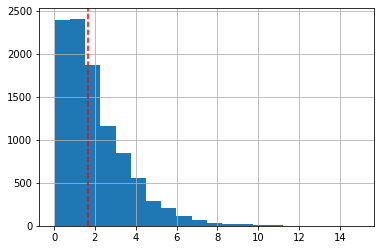

In [ ]:
import matplotlib.pyplot as plt
pd.Series(chi_scores).hist(bins=20);
plt.axvline(chi2observed, color="red", linestyle="--");

The p-value is the proportion of the area to the right of the observed chi-square score (`1.67`):

In [ ]:
chi2observed

1.6659394708658917

In [ ]:
sum(chi_scores >= chi2observed)

4995

In [ ]:
len(chi_scores)

10000

In [ ]:
resampled_p_value = sum(chi_scores >= chi2observed) / len(chi_scores)
resampled_p_value

0.4995

In a world where the null hypothesis is true, there is around 49% chance of getting a result as extreme or more than the observed.

## 5. Theoretical approach

(Scipy)

In [ ]:
observed

,A,B,C
Click,14,8,12
No-click,986,992,988


In [ ]:
from scipy import stats
chisq, pvalue, df, expected = stats.chi2_contingency(observed)  # Fail to rejected this null hypothesis
pvalue

0.4347562562343731

In [ ]:
df #(number of rows - 1) * (number of columns - 1 ) = (2 - 1) * (3 - 1) = 1 * 2 = 2

2

In [ ]:
expected

array([[ 11.33333333,  11.33333333,  11.33333333],
       [988.66666667, 988.66666667, 988.66666667]])

In [ ]:
chisq

1.6659394708658917

## 6. Exercise:

You have tested 2 variants A and B of the "SHOP NOW" button on Eniac's website. 



After the experiment is complete, these are the results:

- Variant A: 134 clicks, 8391 visits.
- Variant B: 102 clicks, 4512 visits.



In [ ]:
import pandas as pd

Click = [134, 102]
Visits = [8391, 4512]

shop_now = pd.DataFrame([Click, Visits],
                           columns = ["Variant_A", "Variant_B"],
                           index = ["Click", "Visits"])
shop_now

,Variant_A,Variant_B
Click,134,102
Visits,8391,4512


In [ ]:
from scipy import stats
chisq, pvalue, df, expected = stats.chi2_contingency(shop_now)  # we will Reject this null hypothesis
pvalue                                                          # aplha is 0.01/ 0.05

0.010379468637043232

In [ ]:
chisq

6.568580797021844

In [ ]:
df

1

In [ ]:
expected

array([[ 153.12428648,   82.87571352],
       [8371.87571352, 4531.12428648]])